# 反爬：驗證碼處理

* 了解「驗證碼機制」的反爬蟲機制
* 「驗證碼機制」反爬蟲的因應策略


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 存取一張圖片，解析成文字

In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,785 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [3]:
import requests
import pytesseract
from PIL import Image
from io import BytesIO

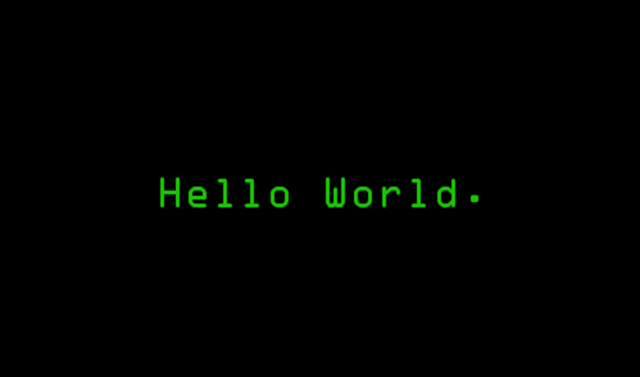

In [4]:
response = requests.get('https://i0.wp.com/www.embhack.com/wp-content/uploads/2018/06/hello-world.png')
img = Image.open(BytesIO(response.content))
img

In [5]:
code = pytesseract.image_to_string(img)
print(code)

Hello World-



## 先下載圖片，再存取，解析成文字

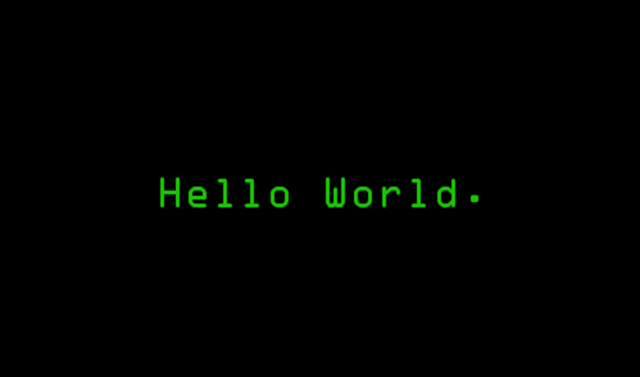

In [6]:
import urllib

urllib.request.urlretrieve('https://i0.wp.com/www.embhack.com/wp-content/uploads/2018/06/hello-world.png', './code.png')  
img = Image.open('./code.png')
img

In [7]:
code = pytesseract.image_to_string(img)
print(code)

Hello World-



## 作業目標

* 讀讀看「test」資料夾下的圖檔！
* 像 test/test2.png 這種複雜的圖片怎麼辦？


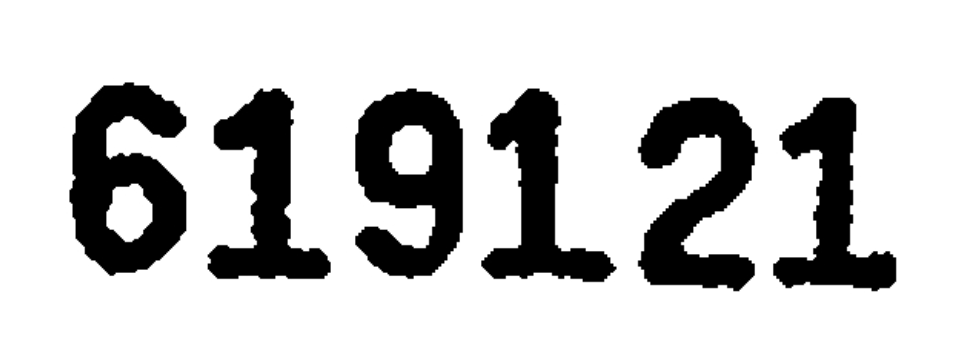

In [8]:
test1 = Image.open('/content/drive/MyDrive/web_crawler/test1.png')
test1

In [9]:
code1 = pytesseract.image_to_string(test1)
print(code1)

619121



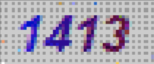

In [10]:
test2 = Image.open('/content/drive/MyDrive/web_crawler/test2.png')
test2

In [11]:
code2 = pytesseract.image_to_string(test2)
print(code2)

1413



## 含雜訊的圖片需先進行預處理<br>
[圖片來源](https://kknews.cc/news/yey63mn.html)

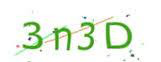

In [12]:
img1 = Image.open('/content/drive/MyDrive/web_crawler/1.jpg')
img1

In [13]:
code = pytesseract.image_to_string(img1)
print(code) #多一個點

3n3D.



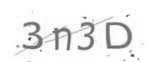

In [14]:
img1_ = img1.convert('L') #轉成灰階
img1_

In [15]:
# 0 -> black, 255 -> white
standard = 150
pixels = img1_.load()
for x in range(img1_.width):
        for y in range(img1_.height):
            if pixels[x, y] > standard:
                pixels[x, y] = 255
            else:
                pixels[x, y] = 0

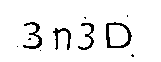

In [16]:
img1_

In [17]:
code = pytesseract.image_to_string(img1_)
print(code) 

3n3D

